## Imports and stuff

In [45]:
import tensorflow as tf
import keras
from keras.layers import Dense,Dropout, Activation
from keras.models import Sequential
from keras.optimizers import *

import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import librosa
from sklearn.linear_model import LogisticRegression, Lasso, ElasticNet
from sklearn.neural_network import MLPClassifier
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings("ignore")

In [69]:
X_train = np.array(np.load("X_train.npy"))
y_train = np.array(np.load("y_train.npy"))
X_dev = np.array(np.load("X_dev.npy"))
y_dev = np.array(np.load("y_dev.npy"))
X_test = np.array(np.load("X_test.npy"))
y_trainonehot = np.array(pd.get_dummies(y_train))
y_devonehot = np.array(pd.get_dummies(y_dev))

In [70]:
def score_func(y_test, y_true):
    if (len(y_test) != len(y_true)):
        raise ValueError("The two arrays aren't of the same length, aborting")
    else:
        return 100*len([y_test[i] for i in range(len(y_test)) if y_test[i]==y_true[i]])/len(y_test)

## Neural Network

In [71]:
print(X_train.shape, X_dev.shape, X_test.shape)
X_tot = np.concatenate([X_train, X_dev, X_test])
lol = PCA(n_components = 50)
X_tot = lol.fit_transform(X_tot)
X_tot = preprocessing.scale(X_tot)
X_train, X_dev, X_test = X_tot[:len(X_train)], X_tot[len(X_train):len(X_train)+len(X_dev)], X_tot[len(X_train)+len(X_dev):]
print(X_train.shape, X_dev.shape, X_test.shape)

(582, 193) (290, 193) (298, 193)
(582, 50) (290, 50) (298, 50)


In [87]:
model = Sequential()
model.add(Dense(25, input_dim = 50))
model.add(Dropout(0.3))
model.add(Activation('relu'))
model.add(Dense(40))
model.add(Dropout(0.3))
model.add(Activation('relu'))
model.add(Dense(15))
model.add(Activation('softmax'))
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [88]:
history = model.fit(np.concatenate([X_train,X_dev]),np.concatenate([y_trainonehot,y_devonehot]), batch_size = 8, epochs = 100, verbose = 0, validation_split = 0.2)
print(model.evaluate(X_train,y_trainonehot))

 32/582 [>.............................] - ETA: 0s[0.015283850268092761, 0.99828178694158076]


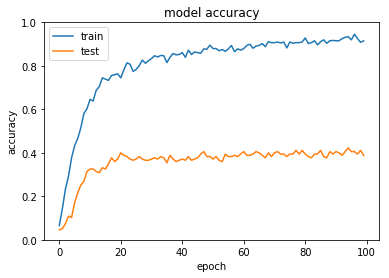

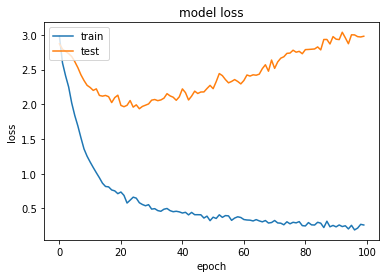

In [89]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.ylim((0,1))
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [75]:
pred = model.predict(X_test)
pred = [np.argmax(pred[i]) for i in range(len(pred))]
np.savetxt('y_pred.txt', pred, fmt="%d")

## Regression Logistique ftw

In [80]:
clf = LogisticRegression()
clf.fit(np.concatenate([X_train,X_dev]),np.concatenate([y_train,y_dev]))
#clf.fit(X_dev, y_dev)
s = clf.predict(X_test)
np.savetxt('y_pred.txt', s, fmt="%d")